In [1]:
from top2vec import Top2Vec

In [2]:
import pandas as pd 

In [42]:
data_path = "path_to_your_dataset"
file_name = "file_name"

In [4]:
feedback_truspilot = pd.read_csv(data_path+file_name)

In [5]:
feedback_truspilot.head(3)

,id,user,timestamp,comment,rating,feedback_link,url_website,brand,company_website
0,15841059265d6e551963bfd57667ffd3fd,5d6e551963bfd57667ffd3fd,1584105926,"La Fnac m’a vendu un produit Dyson contrefait,...",1,https://fr.trustpilot.com/users/5d6e551963bfd5...,https://fr.trustpilot.com/review/www.fnac.com,fnac,http://www.fnac.com?utm_medium=company_profile...
1,15840367745e6a89a2baa51834cf155d4e,5e6a89a2baa51834cf155d4e,1584036774,J'ai refait une tentative (après des années sa...,1,https://fr.trustpilot.com/users/5e6a89a2baa518...,https://fr.trustpilot.com/review/www.fnac.com,fnac,http://www.fnac.com?utm_medium=company_profile...
2,15839960335e69ea7c35d35d00493941b2,5e69ea7c35d35d00493941b2,1583996033,"Site FNAC.COM à fuir, j ai acheté par market p...",1,https://fr.trustpilot.com/users/5e69ea7c35d35d...,https://fr.trustpilot.com/review/www.fnac.com,fnac,http://www.fnac.com?utm_medium=company_profile...


## Train Top2Vec Model
Parameters:

- documents: Input corpus, should be a list of strings.

- speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.

- workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [14]:
#NB in the source code of Top2Vec, change by import umap by import umap.umap_ as umap. Unless it won't be correctly imported
top2vec = Top2Vec(documents=feedback_truspilot.comment, speed="deep-learn", workers=4)
# with fast-learn param, it gives only 1 topic (so no topics) and with learn param it gives 2 topics. Check the diff in the paper 

In [22]:
# This will return the number of topics that Top2Vec has found in the data.
number_topics = top2vec.get_num_topics()
number_topics

11

In [19]:
# topic_sizes: The number of documents most similar to each topic.
# topic_nums: The unique index of every topic will be returned.
topic_sizes, topic_nums = top2vec.get_topic_sizes()

In [17]:
topic_sizes

array([381, 278, 230, 225, 212, 181, 166, 143, 116,  97,  82])

In [18]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
# This will return the topics in decreasing size.
topic_words, word_scores, topic_nums = top2vec.get_topics(number_topics)

In [25]:
# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
topic_words

array([['rapide', 'livres', 'produits', 'annees', 'magasins', 'cher',
        'vendeurs', 'sites', 'commandes', 'dvd', 'achats', 'plutot',
        'experience', 'super', 'seul', 'qualite', 'tres', 'sont', 'decu',
        'besoin', 'mieux', 'trop', 'etc', 'autres', 'articles',
        'marketplace', 'choix', 'avis', 'retrait', 'prix', 'mauvais',
        'moins', 'adherent', 'livraison', 'ailleurs', 'emballage',
        'personnes', 'amazon', 'peu', 'grand', 'respect', 'problemes',
        'sa', 'etoile', 'manque', 'des', 'etat', 'acheter', 'livre',
        'cadeaux'],
       ['annulee', 'decembre', 'fournisseur', 'noel', 'commande',
        'disponible', 'date', 'livraison', 'debite', 'expedition',
        'rappelle', 'annuler', 'article', 'message', 'passee', 'stock',
        'recois', 'casque', 'retard', 'paiement', 'remboursee',
        'question', 'devait', 'annulation', 'premiere', 'toujours',
        'sous', 'lendemain', 'attente', 'cadeau', 'janvier', 'cadeaux',
        'expedie'

In [27]:
# word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.
word_scores

array([[0.2974, 0.2884, 0.2811, 0.2792, 0.2674, 0.2527, 0.2224, 0.2104,
        0.2082, 0.1958, 0.1955, 0.1891, 0.1881, 0.1863, 0.1829, 0.1784,
        0.173 , 0.1646, 0.1623, 0.1615, 0.1606, 0.158 , 0.1551, 0.1518,
        0.1501, 0.1461, 0.1449, 0.135 , 0.1348, 0.1304, 0.1275, 0.1267,
        0.124 , 0.1239, 0.122 , 0.1208, 0.1197, 0.1194, 0.1173, 0.1165,
        0.1159, 0.1156, 0.114 , 0.1139, 0.1117, 0.1107, 0.1079, 0.107 ,
        0.1043, 0.1033],
       [0.34  , 0.3042, 0.2998, 0.2998, 0.2814, 0.28  , 0.2413, 0.2394,
        0.2381, 0.2335, 0.2328, 0.2304, 0.2292, 0.224 , 0.2198, 0.2045,
        0.1974, 0.1932, 0.1926, 0.1924, 0.1893, 0.1817, 0.1812, 0.1793,
        0.1779, 0.172 , 0.1694, 0.166 , 0.166 , 0.1642, 0.1559, 0.1541,
        0.1516, 0.1483, 0.1466, 0.1428, 0.1422, 0.1409, 0.1404, 0.14  ,
        0.1375, 0.1353, 0.135 , 0.1343, 0.1286, 0.1273, 0.1271, 0.1263,
        0.1259, 0.1255],
       [0.4377, 0.368 , 0.3469, 0.3338, 0.3058, 0.2988, 0.2937, 0.2877,
        0.2334

In [31]:
# We are going to search for topics most similar to a given word
word = 'livraison'
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=[word], num_topics=5)

In [33]:
# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
topic_nums

array([1, 8, 4, 0, 7])

In [34]:
#topic_scores: For each topic the cosine similarity to the search keywords will be returned.
topic_scores

array([0.2394, 0.206 , 0.1496, 0.1239, 0.1055])

In [37]:
# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
topic_words[:2]

[array(['annulee', 'decembre', 'fournisseur', 'noel', 'commande',
        'disponible', 'date', 'livraison', 'debite', 'expedition',
        'rappelle', 'annuler', 'article', 'message', 'passee', 'stock',
        'recois', 'casque', 'retard', 'paiement', 'remboursee', 'question',
        'devait', 'annulation', 'premiere', 'toujours', 'sous',
        'lendemain', 'attente', 'cadeau', 'janvier', 'cadeaux', 'expedie',
        'mails', 'montant', 'jours', 'temps', 'livre', 'decide',
        'inadmissible', 'nouvelles', 'entre', 'mail', 'ayant', 'informe',
        'market', 'annule', 'nouveau', 'derniere', 'confirmation'],
       dtype='<U15'),
 array(['relais', 'point', 'colis', 'recuperer', 'devait', 'retrait',
        'chronopost', 'arrive', 'enquete', 'livre', 'livraison',
        'lendemain', 'retard', 'tv', 'decembre', 'pc', 'explique', 'mail',
        'suivi', 'attendre', 'voila', 'personnes', 'aller', 'donner',
        'transporteur', 'client', 'telephonique', 'dois', 'heure',
    

In [39]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=3, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1817, Score: 0.6267377138137817
-----------
Achat en avril 2016  FNAC ANNECY d'un feiyu gw100 pour go pro.tombe en panne après 10 utilisations en mode "modéré " marche et velo.transmis au magasin en bon état (constat écrit).retour de SAV.la garantie ne marche pas: l appareil a subi des chocs importants et des vis sont rouillées !!! Devis de réparation dissuasif ! par contre destruction gratuite ! si c'est pas se moquer du client ! Impossible de rencontrer le Directeur bien sûr.
-----------

Document: 1533, Score: 0.5791181325912476
-----------
sav fnac 377€ de réparation pour un téléphone qui vaut 299€ soit disant "oxydé" alors qu'il ne l'on même pas démonté. appareil jamais mouillé.
-----------

Document: 1339, Score: 0.5759790539741516
-----------
Très déçue de la fnac en particulier celle de Tours. Voilà à peine deux semaines que j'ai acheté mon IPhone 7 et j'ai déjà des problèmes! Je me suis rendue 3 fois pour qu'ils puissent enfin échanger mon appareil défectueux et il m

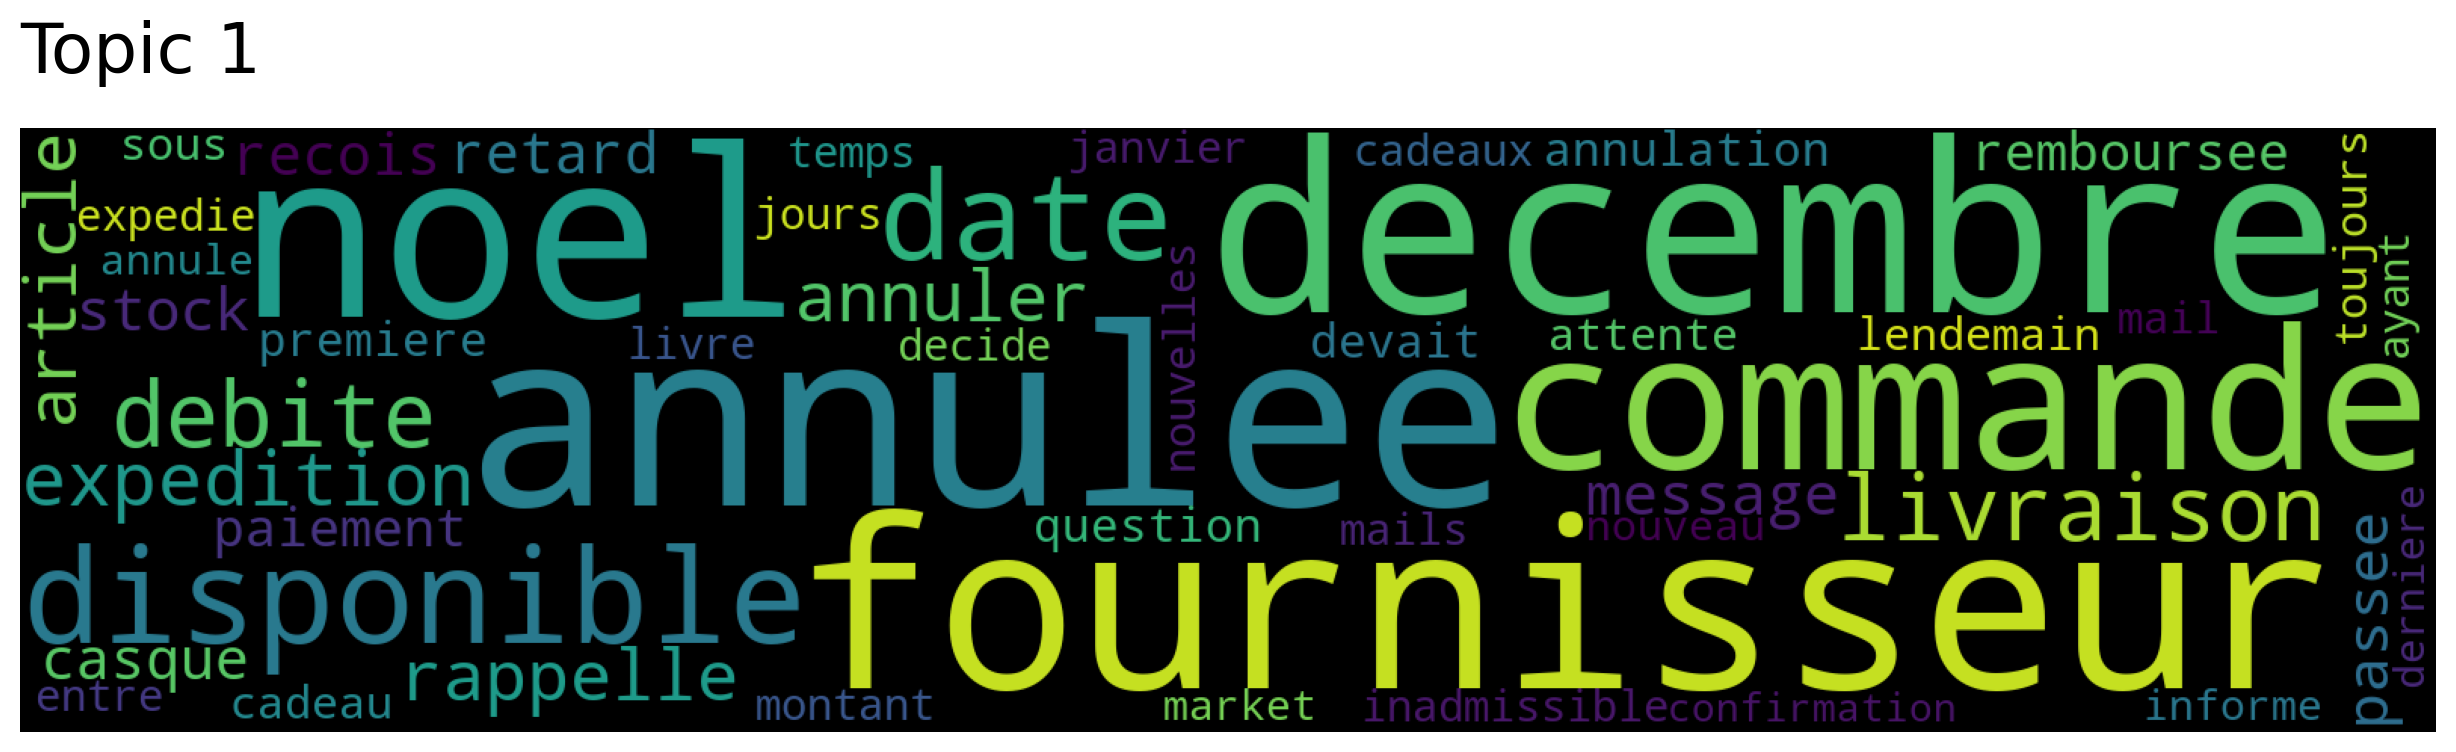

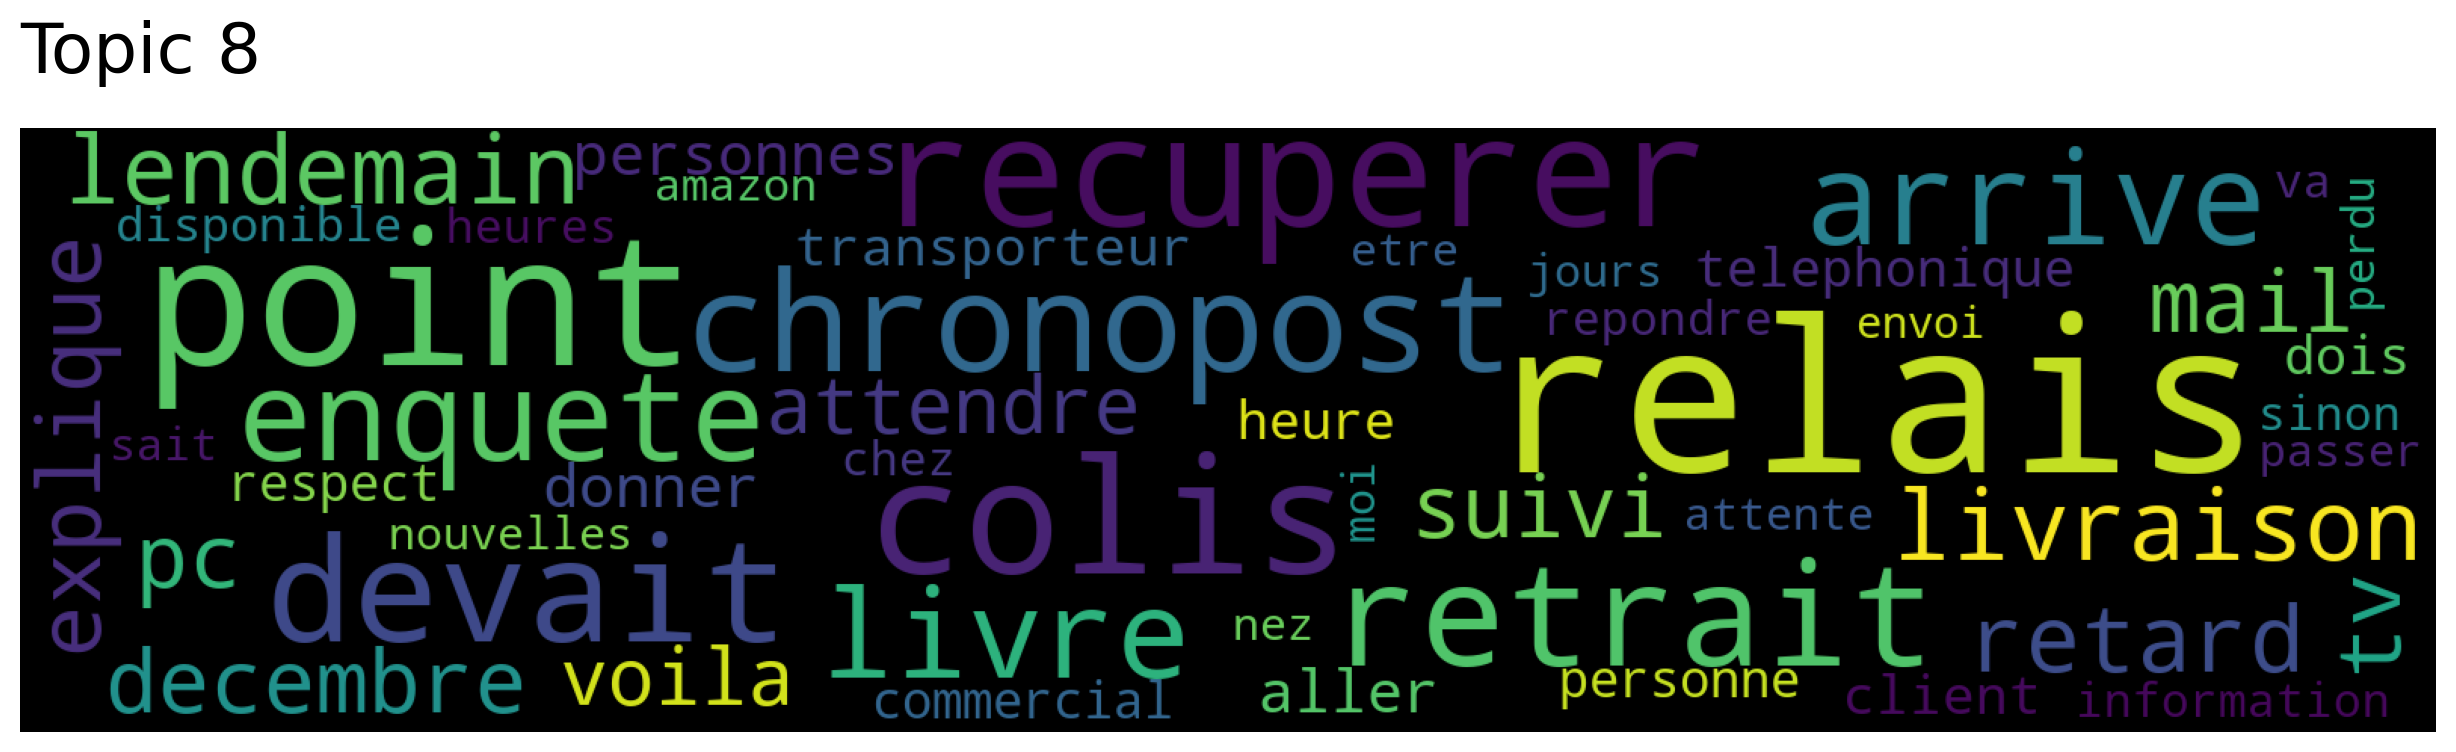

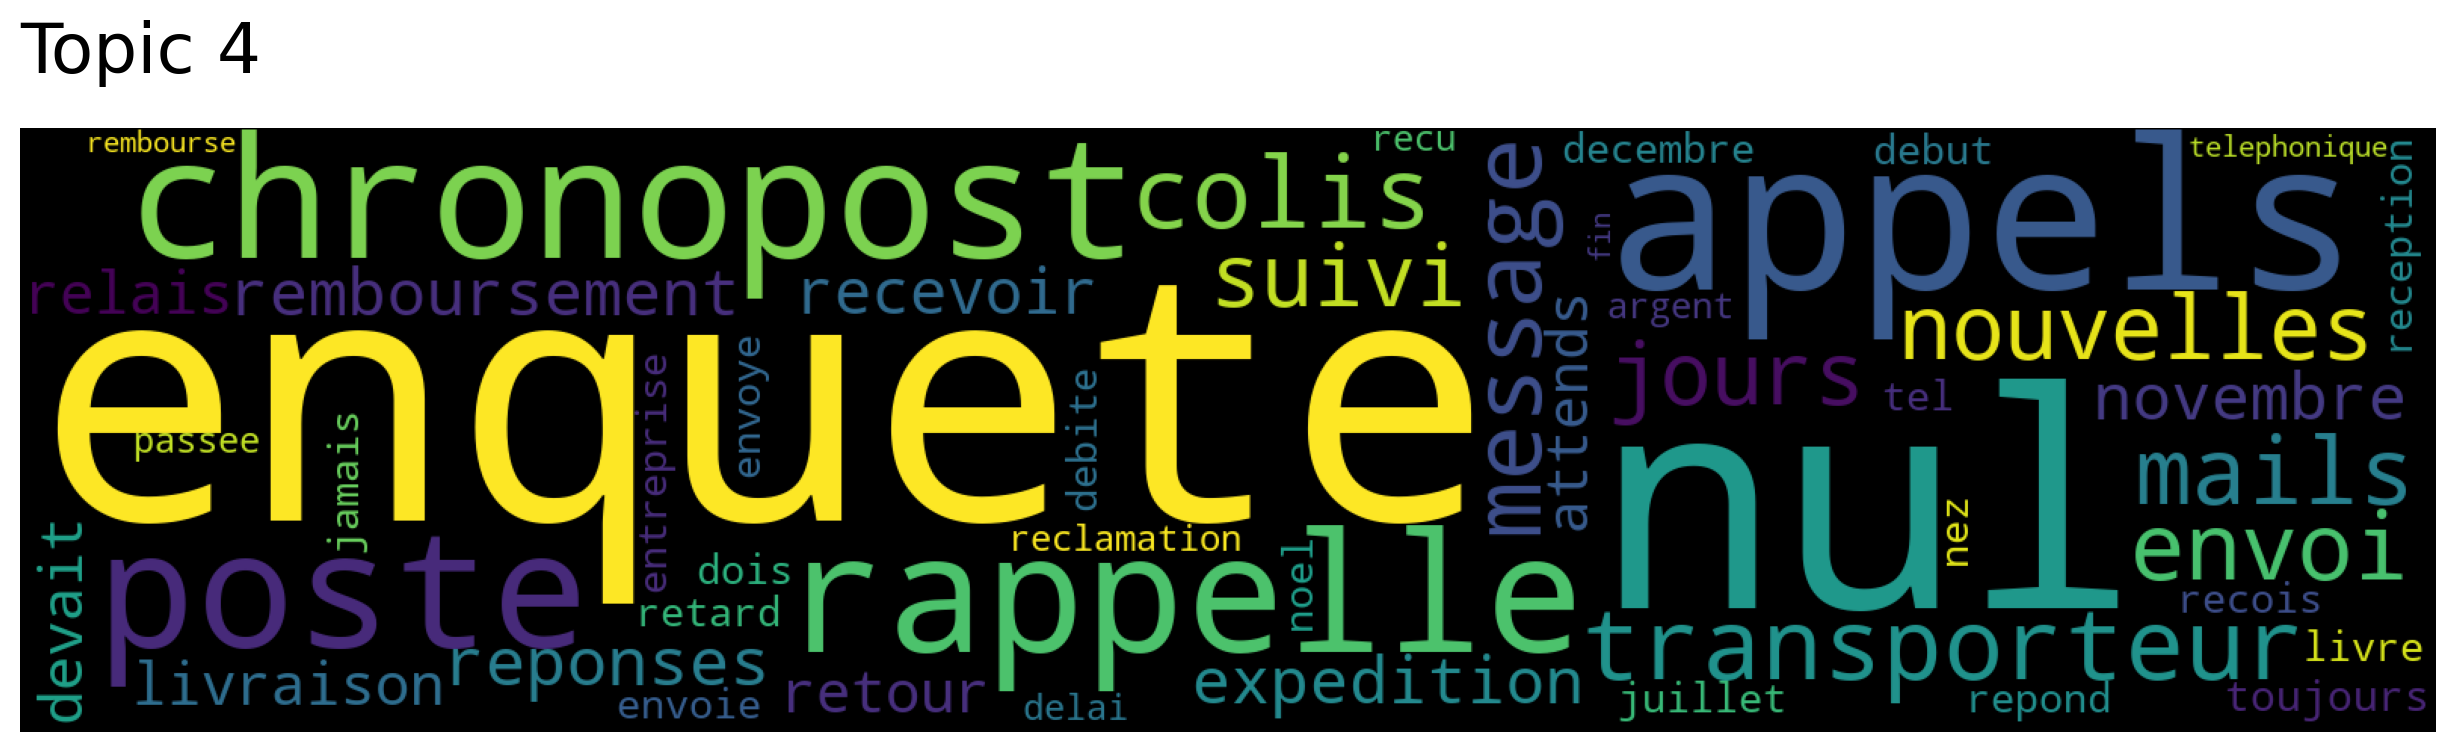

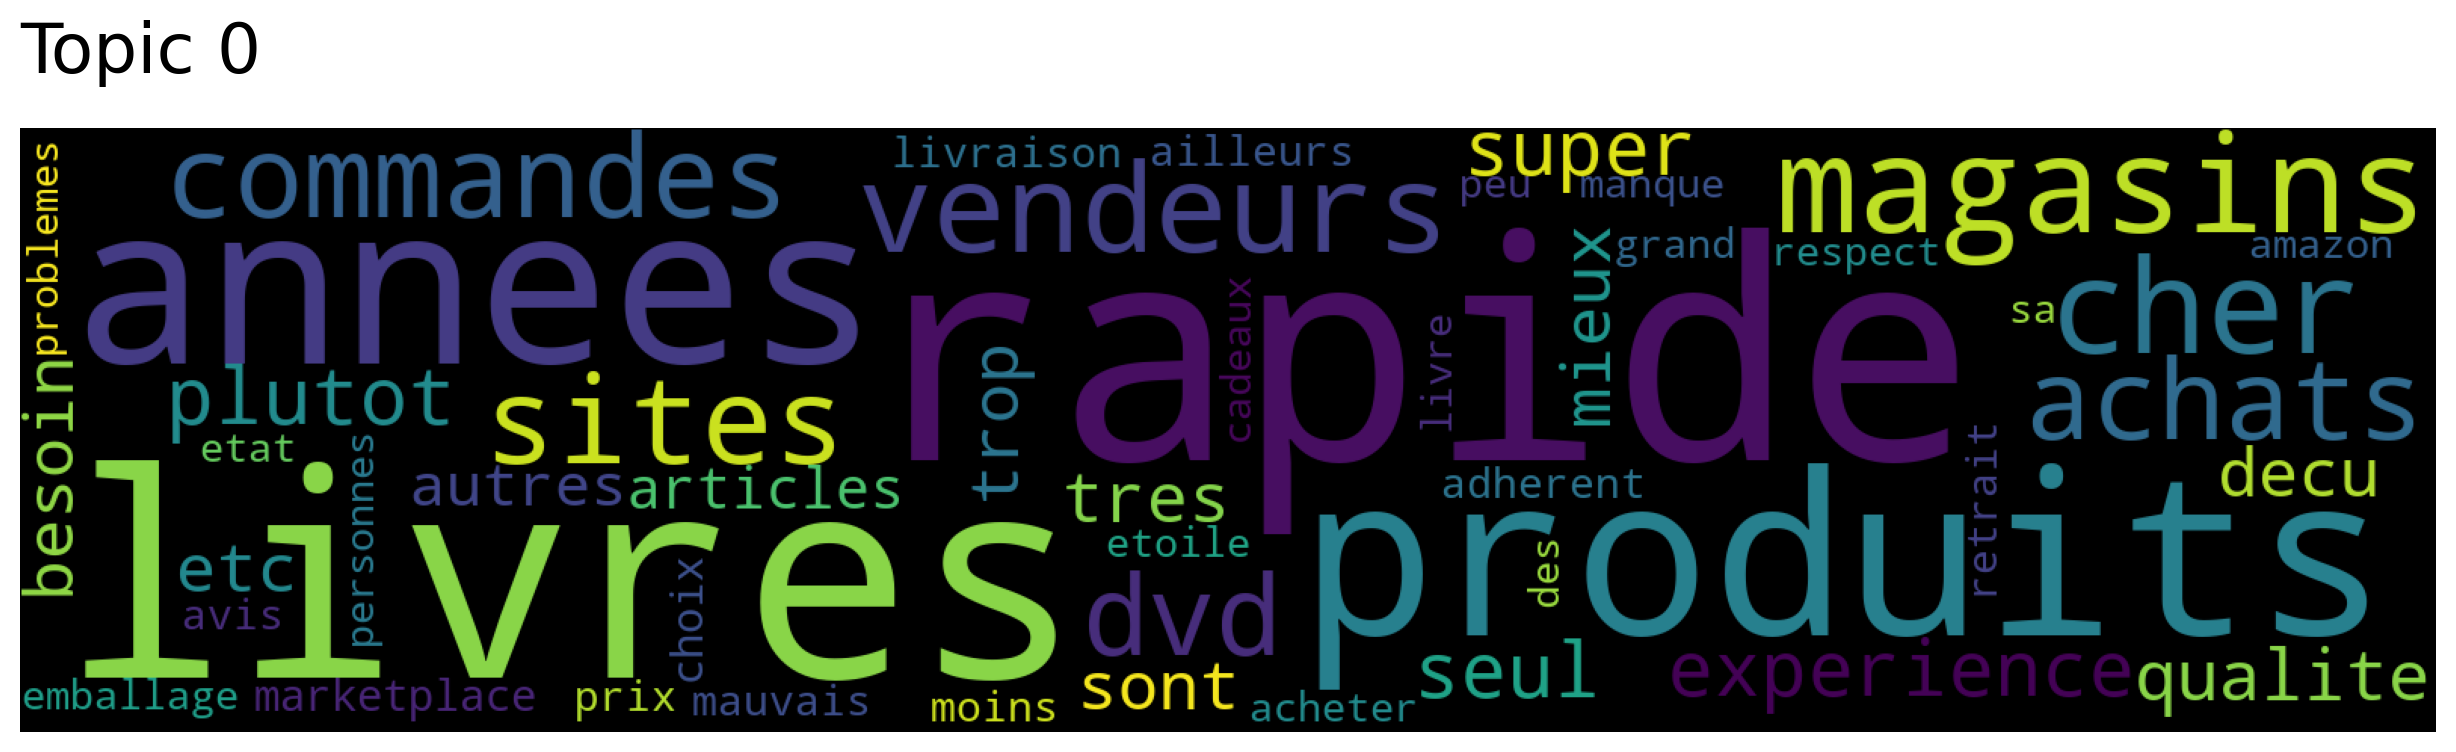

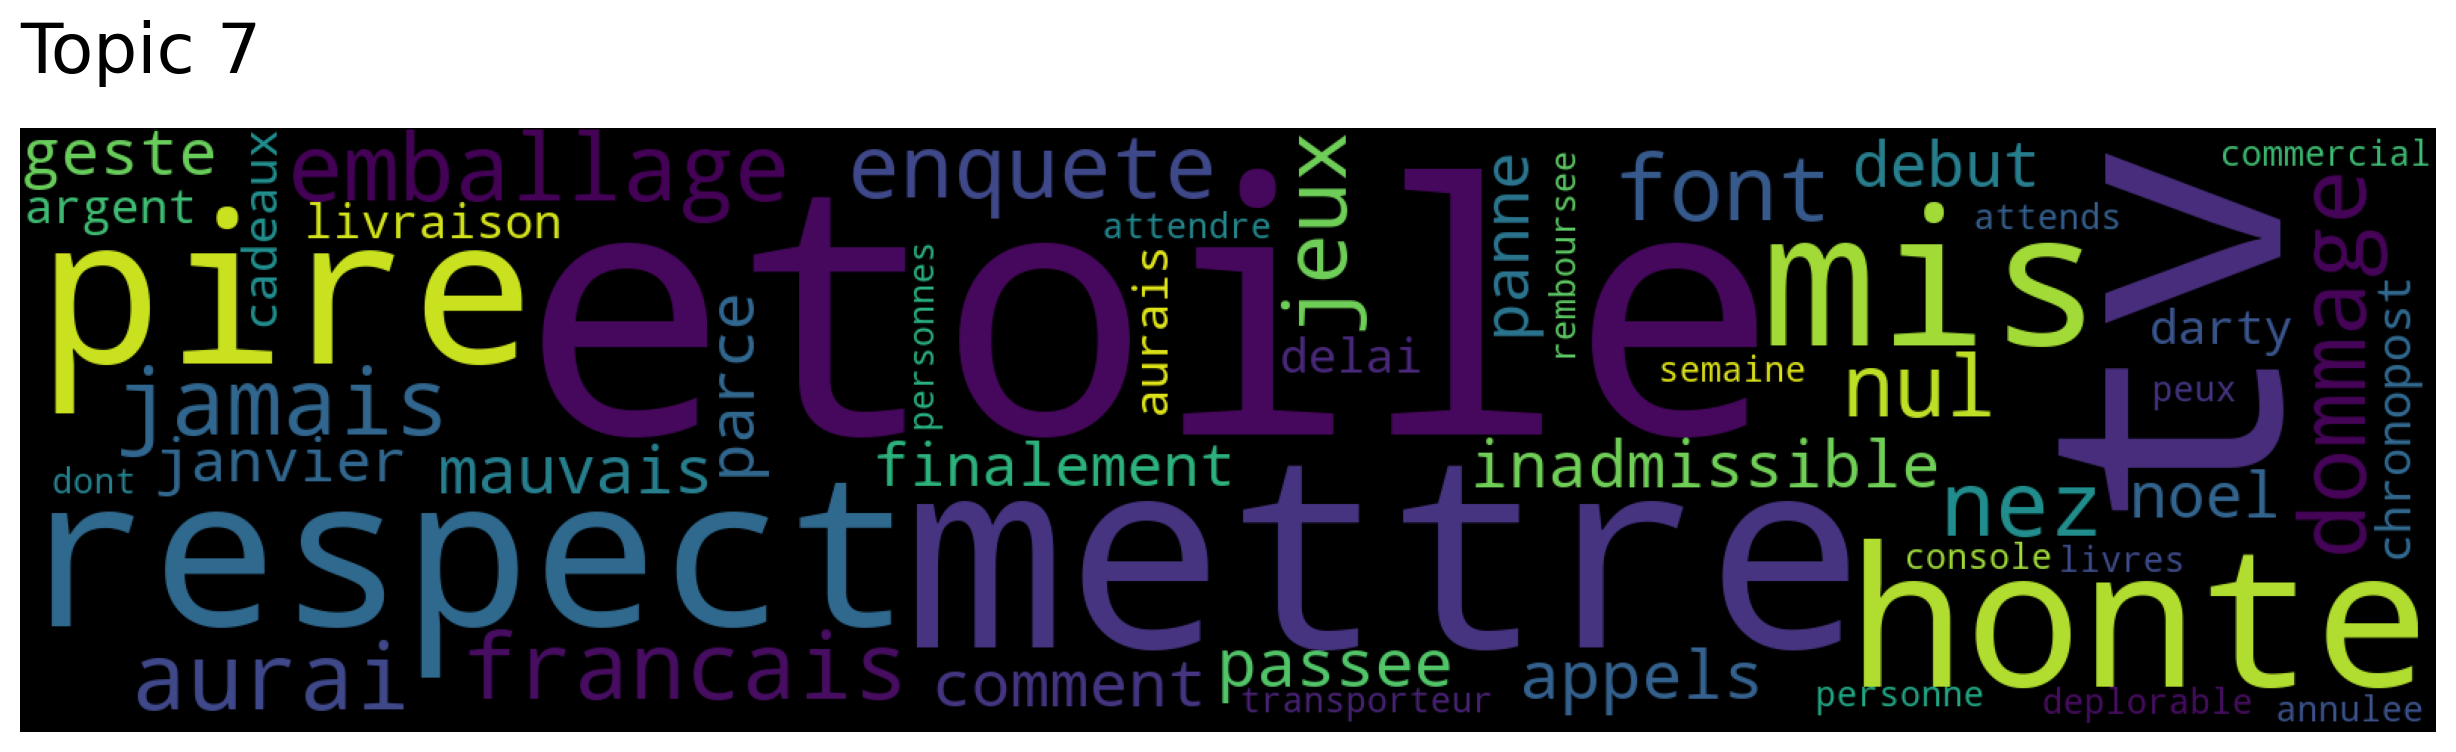

In [41]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["livraison"], num_topics=5)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)